In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

from seaborn import pairplot
from collections import Counter
from matplotlib import gridspec

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("data.csv")
data

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [3]:
np.sum(data.isnull())

CYT    0
NUC    0
MIT    0
ME3    0
ME2    0
ME1    0
EXC    0
VAC    0
POX    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CYT     1484 non-null   object 
 1   NUC     1484 non-null   float64
 2   MIT     1484 non-null   float64
 3   ME3     1484 non-null   float64
 4   ME2     1484 non-null   float64
 5   ME1     1484 non-null   float64
 6   EXC     1484 non-null   float64
 7   VAC     1484 non-null   float64
 8   POX     1484 non-null   float64
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


In [5]:
no_cyt = data.iloc[:,1:9]
no_cyt

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


### Latih Algoritma K-Means

In [6]:
sum_of_squared_distances = {}
range_n_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    model = KMeans(n_clusters = n_cluster,
                  init = 'random',
                  n_init = 10,
                  random_state = 0)
    
    # proses training
    model.fit(no_cyt)
    
    sum_of_squared_distances[n_cluster] = model.inertia_

##### Elbow Method Chart

In [7]:
sum_of_squared_distances

{1: 123.4778340296498,
 2: 95.83129556833937,
 3: 80.64452683333253,
 4: 71.31498742232733,
 5: 64.14364255389573,
 6: 60.400541655068686,
 7: 57.91587542357354,
 8: 50.024524900119545,
 9: 47.89435566634454,
 10: 45.789765097151374}

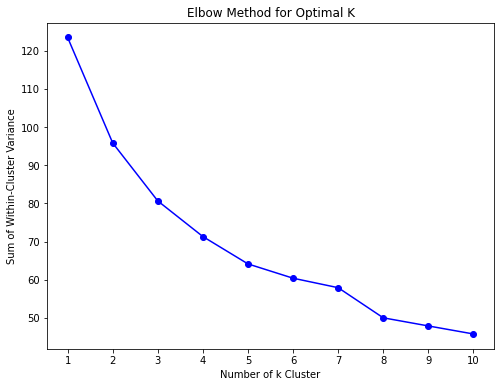

In [8]:
plt.figure(figsize = (8,6))

plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of k Cluster")
plt.ylabel("Sum of Within-Cluster Variance")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sum_of_squared_distances.values(),
        '-o', color = "Blue")

plt.show()

In [9]:
sil = {}
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters = n_cluster,
                      init = 'random',
                      n_init = 10,
                      random_state = 0)
    
    preds = clusterer.fit_predict(no_cyt)
    score = silhouette_score(no_cyt, preds, metric = "euclidean")
    
    sil[n_cluster] = score

##### Silhouette

In [10]:
for n_cluster, sil_score in sil.items():
    print(n_cluster, ":", sil_score)

2 : 0.26428226568331237
3 : 0.26712238050533
4 : 0.26083500806419563
5 : 0.20695748010431753
6 : 0.19772120192909265
7 : 0.16761843053518455
8 : 0.18176816701386214
9 : 0.17128073440127095
10 : 0.1697453339687665


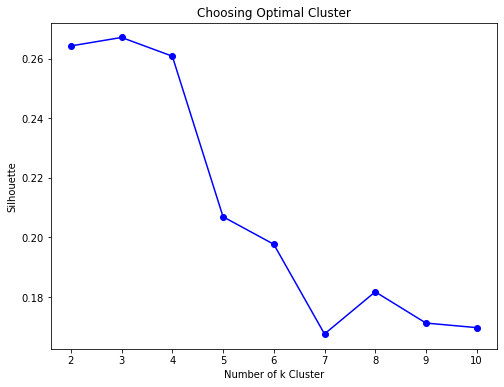

In [11]:
plt.figure(figsize = (8,6))

plt.title("Choosing Optimal Cluster")
plt.xlabel("Number of k Cluster")
plt.ylabel("Silhouette")
plt.xticks(range_n_clusters)

plt.plot(range_n_clusters, 
        sil.values(),
        '-o', color = "Blue")

plt.show()

In [12]:
kmean = KMeans(n_clusters = 5)
data['category'] = kmean.fit_predict(no_cyt)
data

,CYT,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,category
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,1
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,0
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,1
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,0
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,3
...,...,...,...,...,...,...,...,...,...,...
1479,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,1
1480,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,2
1481,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,1
1482,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,2


C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\25and\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


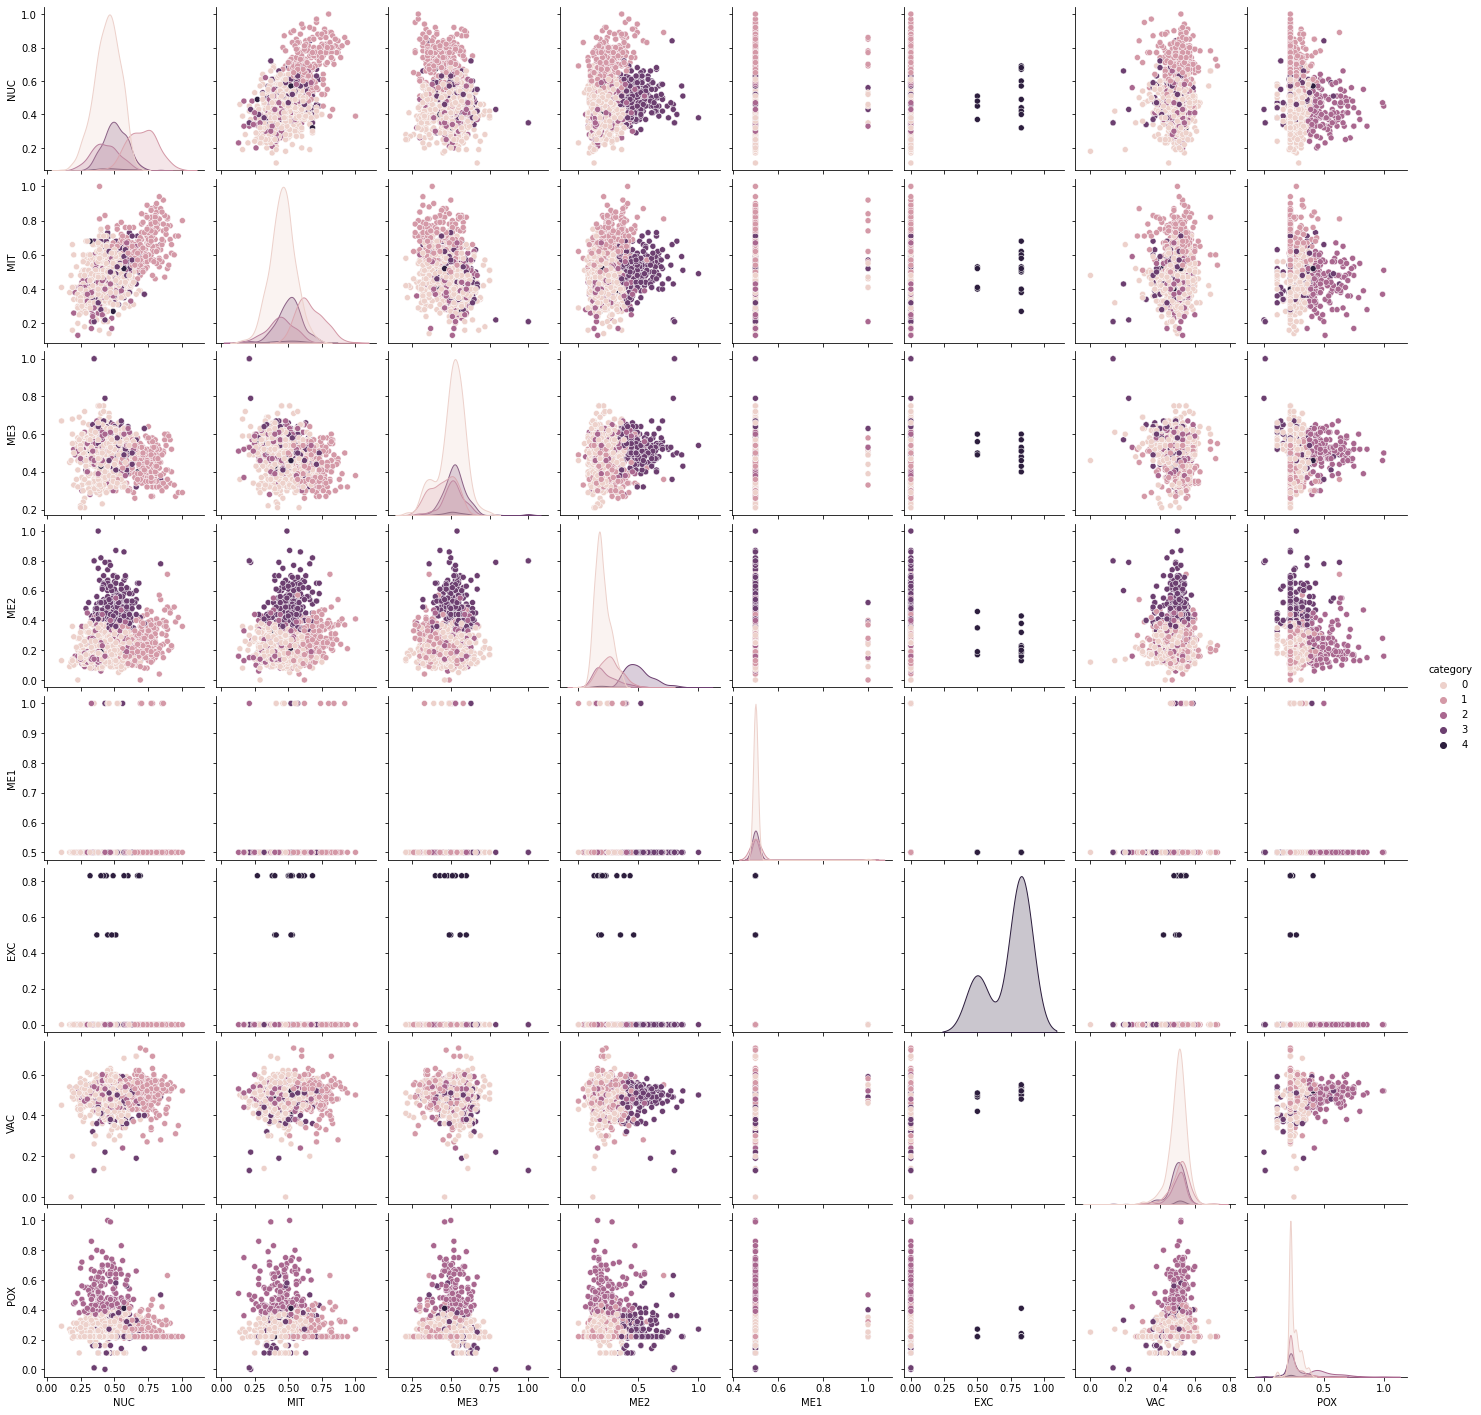

In [13]:
pairplot(data, hue = 'category')

Berdasarkan data yang tersedia, terapkan metode klasterisasi guna mengelompokkan tiap baris pada kelompok tertentu. Sehingga hasil akhir yang diminta adalah 1 kolom tambahan yang merupakan penentu baris tersebut adalah kategori/klaster yang mana. Untuk menjawab soal ini, silahkan simak materi pertemuan ke sepuluh yang membahas <i>predictive analytics</i> (<i>unsupervised learning/clustering</i>).

Setelah mendapatkan kategori untuk tiap baris pada data di atas, maka latih sebuah algoritma klasifikasi pada <i>dataset</i> yang barusan kalian olah untuk dapat memprediksi masukan baru. Untuk menjawab soal ini, silahkan simak materi pertemuan ke sembilan yang membahas <i>predictive analytics</i> (<i>supervised learning</i>).

In [14]:
kmean = KMeans(n_clusters = 5)
no_cyt['category'] = kmean.fit_predict(no_cyt)
no_cyt

,NUC,MIT,ME3,ME2,ME1,EXC,VAC,POX,category
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,4
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,1
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,4
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,0
...,...,...,...,...,...,...,...,...,...
1479,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,4
1480,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,3
1481,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,4
1482,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,1


In [15]:
knn = KNeighborsClassifier()
x_train, x_test, y_train, y_test = train_test_split(no_cyt[no_cyt.columns[:-1]], 
                                                    no_cyt['category'], 
                                                    test_size = 0.2)

In [16]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
hasil_prediksi = knn.predict(x_test)
print(classification_report(hasil_prediksi, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.96      0.87      0.92       149
           2       1.00      1.00      1.00         6
           3       0.68      1.00      0.81        25
           4       0.90      0.93      0.91        56

    accuracy                           0.92       297
   macro avg       0.90      0.96      0.92       297
weighted avg       0.93      0.92      0.92       297



In [18]:
print(hasil_prediksi)
print(y_test.tolist())

[1 4 3 0 4 3 1 4 2 1 1 3 1 4 0 1 1 1 3 3 1 1 1 1 1 1 1 1 1 1 0 1 1 4 1 1 0
 0 1 3 3 0 0 4 1 1 1 0 3 4 1 1 0 1 4 1 1 1 0 1 4 1 0 4 0 1 0 1 1 2 4 1 0 4
 1 4 3 1 1 1 0 4 0 1 4 0 3 4 4 1 1 0 4 2 0 1 1 4 1 1 1 4 4 4 1 1 1 1 1 0 3
 1 1 1 4 1 0 4 1 1 1 1 1 0 0 1 1 1 1 1 0 1 4 1 3 0 3 1 4 0 1 3 1 0 1 0 4 1
 1 4 3 1 3 4 1 0 0 1 1 1 1 4 0 2 1 4 1 1 1 1 1 4 4 1 3 1 1 1 1 0 1 1 1 4 0
 1 1 0 4 3 0 4 1 4 4 4 1 1 0 1 1 1 0 1 0 1 4 0 1 0 3 3 0 4 1 0 1 1 0 1 3 0
 1 1 1 1 4 1 1 1 0 1 0 1 2 1 1 4 4 4 1 0 4 1 4 0 1 0 3 1 3 0 1 1 4 1 4 0 1
 1 0 1 4 4 4 1 0 1 1 1 4 0 3 0 1 1 4 1 1 0 4 1 3 0 1 1 1 2 1 4 0 0 1 0 0 1
 1]
[1, 4, 3, 0, 4, 3, 1, 4, 2, 1, 1, 3, 1, 4, 0, 4, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 4, 1, 1, 0, 0, 1, 3, 3, 0, 0, 4, 1, 1, 1, 0, 3, 1, 1, 1, 0, 1, 4, 1, 3, 1, 0, 1, 4, 1, 0, 4, 0, 1, 0, 1, 1, 2, 4, 1, 0, 4, 1, 4, 3, 1, 1, 1, 0, 4, 0, 1, 4, 0, 3, 4, 1, 1, 1, 0, 4, 2, 0, 3, 3, 4, 1, 1, 3, 4, 4, 4, 4, 1, 1, 1, 1, 0, 3, 1, 1, 1, 4, 1, 0, 4, 1, 1, 1, 1, 3, 0, 0, 1, 4, 1, 1, 1, 0, 1,

In [19]:
knn.predict([[0.50, 0.43, 0.47, 0.13, 0.5, 0.0, 0.40, 0.34]])

array([1])